In [1]:
!gdown --id 1FxdYTtHxLUER4ZHWZQ6aSB_ds7D26PRD

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1FxdYTtHxLUER4ZHWZQ6aSB_ds7D26PRD
To: /content/юридический_помощник.zip
100% 6.37M/6.37M [00:00<00:00, 101MB/s]


In [2]:
!unzip /content/юридический_помощник.zip

Archive:  /content/юридический_помощник.zip
   creating: Документы/
  inflating: Документы/208_ot_18_fevralya_2022.docx  
  inflating: Документы/221_ot_19_02_2022.docx  
  inflating: Документы/33__33__33__33_o_vnesen_izm_33__33_Postanovlenie_Pravitelstva_RF_ot_28_10_2021_N_1850.docx  
  inflating: Документы/392_ot_17_marta_2022.docx  
  inflating: Документы/453_ot_24_marta_2022.docx  
  inflating: Документы/469_ot_25_marta_2022.docx  
  inflating: Документы/574_ot_2_aprelya_2022.docx  
  inflating: Документы/662_ot_14_04_2022.docx  
  inflating: Документы/662_ot_14_aprelya_2022.docx  
  inflating: Документы/664_ot_14_04_2022.docx  
  inflating: Документы/664_ot_14_aprelya_2022.docx  
  inflating: Документы/761_ot_27_04_2022.docx  
  inflating: Документы/761_ot_27_aprelya_2022.docx  
  inflating: Документы/772_ot_28_aprelya_2022.docx  
  inflating: Документы/804_ot_30_aprelya_2022.docx  
  inflating: Документы/811_ot_4_maya_2022.docx  
  inflating: Документы/814_ot_5_maya_2022.docx  
  

In [3]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 27.6 MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184507 sha256=0338b3fce4163bff22de938923ce942d5a5178ca3c246cc36c665170c8d29f02
  Stored in directory: /root/.cache/pip/wheels/f6/6f/b9/d798122a8b55b74ad30b5f52b01482169b445fbb84a11797a6
Successfully built python-docx


In [5]:
from docx import Document
document = Document('docs/208_ot_18_fevralya_2022.docx')
print(document.paragraphs)

[<docx.text.paragraph.Paragraph object at 0x7f86a2c09390>, <docx.text.paragraph.Paragraph object at 0x7f86a2c093d0>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09450>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09490>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09510>, <docx.text.paragraph.Paragraph object at 0x7f86a2c095d0>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09610>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09690>, <docx.text.paragraph.Paragraph object at 0x7f86a2c096d0>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09550>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09750>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09790>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09810>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09850>, <docx.text.paragraph.Paragraph object at 0x7f86a2c098d0>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09910>, <docx.text.paragraph.Paragraph object at 0x7f86a2c09990>, <docx.text.pa

In [ ]:

for p in document.paragraphs:
  if p.text.find('{')>-1:
    l=(re.findall('{(.+?)}',p.text))
    res = re.findall(r'\{.*?\}.*?\{.*?\}', p.text)
    for i in res:
      print(i)
    # df.loc[len(df.index)] = [p.text[start+1:end], int(l[0])]
    # print(p.text,)


In [19]:
import pandas as pd

df = pd.DataFrame({'content': [],
                   'tag': []
})

In [23]:
df

,content,tag
0,"{2}Настоящие Правила устанавливают цели, услов...",2.0
1,"{1} Понятия, используемые в настоящих Правилах...",1.0
2,"{1} ""администратор"" - юридическое лицо любой о...",1.0
3,{1} наличие официального сайта в информационно...,1.0
4,{1} опыт участия не менее 2 лет в государствен...,1.0
...,...,...
18584,{10} Оценка проводится экспертной комиссией в ...,10.0
18585,{10} а также перспективности дальнейшей реали...,10.0
18586,{10} На основании результатов оценки предварит...,10.0
18587,{27} Результаты оценки предварительного отчета...,27.0


In [24]:
for i in range(18589):
  string = re.sub(r'{(.+?)}', '', df.content[i])
  df.content[i]=string


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
import glob

k=0
files=[]
for filepath in glob.iglob('docs/*.docx'):
    k+=1
    files.append(filepath)
files


['docs/Postanovlenie_Pravitelstva_RF_ot_25_08_2021_N_1406_gotovoe.docx',
 'docs/Postanovlenie_Pravitelstva_RF_ot_09_12_2020_N_2061.docx',
 'docs/PP_RF_ot_12_10_2019_N_1320.docx',
 'docs/804_ot_30_aprelya_2022.docx',
 'docs/664_ot_14_04_2022.docx',
 'docs/Постановление Правительства РФ от 27.12.2019 N 1870.docx',
 'docs/Postanovlenie_Pravitelstva_RF_ot_19_08_2017_N_985_docx.docx',
 'docs/Postanovlenie_Pravitelstva_RF_ot_22_02_2021_N_245_Khromykh_i_Kononova.docx',
 'docs/Postanovlenie_pravitelstva_RF18_01_2017_N_27_Gumerova.docx',
 'docs/Postanovlenie_Pravitelstva_RF_ot_19_02_2021_N_226.docx',
 'docs/Postanovlenie_Pravitelstva_RF_ot_29_09_2017_N_1179.docx',
 'docs/Postanovlenie_Pravitelstva_Rossiyskoy_Federatsii_ot_07_04_2022_612.docx',
 'docs/Постановление Правительства РФ от 05.07.2021 N 1120.docx',
 'docs/Postanovlenie_Praitelstva_ot_18_03_2022_397.docx',
 'docs/Postanovlenie_Pravitelstva_Rossiyskoy_Federatsii_ot_21_08_2020_1265.docx',
 'docs/Postanovlenie_Pravitelstva_Rossiyskoy_Fede

In [12]:
import re
for i in files:
  document = Document(i)
  print(i)
  for p in document.paragraphs:
    try:
        l=0
        res = re.findall(r'\{.*?\}.*?\{.*?\}', p.text)
        for i in res:
          l=(re.findall('{(.+?)}',i))
          print(i, int(l[0]))
          # df.loc[len(df.index)] = [i, int(l[0])]
    except:
      print(p.text)
  break
      


docs/Postanovlenie_Pravitelstva_RF_ot_25_08_2021_N_1406_gotovoe.docx
{2}Настоящие Правила устанавливают цели, условия и порядок предоставления в 2021 году из федерального бюджета субсидии автономной некоммерческой организации "Россия - страна возможностей" (далее - организация) в целях поощрения участников конкурсов и проектов организации и Общероссийской общественно-государственной просветительской организации "Российское общество "Знание" в виде туристских поездок (далее - субсидия).{2} 2
{1} Понятия, используемые в настоящих Правилах, означают следующее: {1} 1
{1} "администратор" - юридическое лицо любой организационно-правовой формы, зарегистрированное на территории Российской Федерации, размещающее информацию о туристских продуктах в поисковой системе на основании договора, заключенного с организацией, и отвечающее следующим требованиям: {1} 1
{1} наличие официального сайта в информационно-телекоммуникационной сети "Интернет";{1} 1
{1} опыт участия не менее 2 лет в государственных

In [21]:
df

,content,tag
0,"Настоящие Правила устанавливают цели, условия ...",2.0
1,"Понятия, используемые в настоящих Правилах, о...",1.0
2,"""администратор"" - юридическое лицо любой орга...",1.0
3,наличие официального сайта в информационно-те...,1.0
4,опыт участия не менее 2 лет в государственных...,1.0
...,...,...
18610,Оценка проводится экспертной комиссией в тече...,10.0
18611,а также перспективности дальнейшей реализаци...,10.0
18612,На основании результатов оценки предварительн...,10.0
18613,Результаты оценки предварительного отчета о р...,27.0


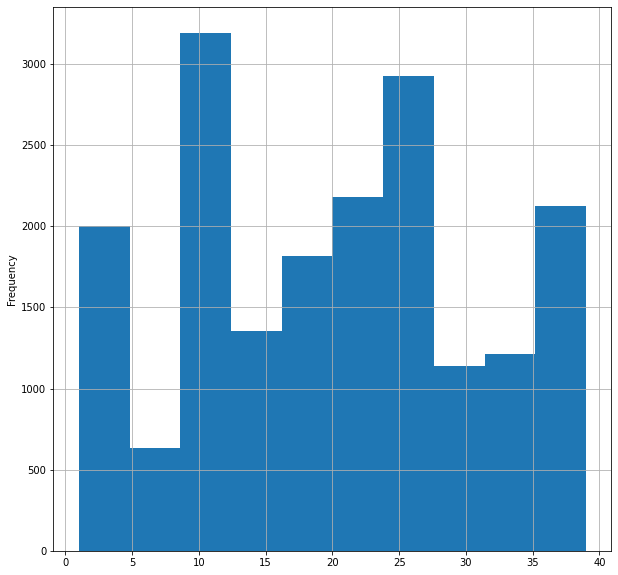

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
df['tag'].plot(kind='hist',figsize=(10,10),ax=ax)
ax.grid()


Балансировка данных

In [26]:
df.tag.value_counts(ascending=True)

9.0       38
14.0      42
34.0      44
23.0      63
33.0      69
8.0       81
39.0      82
5.0       82
18.0     104
31.0     105
32.0     113
25.0     123
26.0     124
29.0     172
6.0      190
28.0     213
3.0      231
16.0     240
13.0     276
37.0     281
7.0      283
4.0      313
20.0     355
17.0     366
12.0     462
36.0     604
30.0     650
21.0     671
2.0      688
1.0      771
15.0     796
35.0     988
27.0    1047
22.0    1094
38.0    1158
10.0    1235
19.0    1344
11.0    1456
24.0    1635
Name: tag, dtype: int64

In [27]:
import imblearn
print(imblearn.__version__)

0.8.1


In [28]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

for i in range(38):
  over_sampler = RandomOverSampler(sampling_strategy="minority")
  X = df.iloc[:, :1]
  Y = df.iloc[:, 1]

  X_oversampled, Y_oversampled = over_sampler.fit_resample(X, Y)
  counter = 0
  o_df = pd.DataFrame()
  for i in list(df.columns)[:1]:
      o_df[i] = X_oversampled[i]
      counter += 1
      
  o_df["Class"] = Y_oversampled
  df = o_df.copy()
# Counter(Y_oversampled)

In [29]:
df.Class.value_counts(ascending=True)

2.0     1635
33.0    1635
34.0    1635
4.0     1635
3.0     1635
23.0    1635
39.0    1635
22.0    1635
37.0    1635
8.0     1635
13.0    1635
15.0    1635
6.0     1635
12.0    1635
30.0    1635
17.0    1635
5.0     1635
10.0    1635
16.0    1635
36.0    1635
29.0    1635
1.0     1635
35.0    1635
24.0    1635
32.0    1635
27.0    1635
38.0    1635
25.0    1635
28.0    1635
31.0    1635
18.0    1635
11.0    1635
19.0    1635
20.0    1635
21.0    1635
14.0    1635
7.0     1635
26.0    1635
9.0     1635
Name: Class, dtype: int64

In [30]:
df = df.rename({'Class': 'tag'}, axis=1)

In [31]:
df.tag.value_counts().mean()

1635.0

In [32]:
df

,content,tag
0,"Настоящие Правила устанавливают цели, условия ...",2.0
1,"Понятия, используемые в настоящих Правилах, о...",1.0
2,"""администратор"" - юридическое лицо любой орга...",1.0
3,наличие официального сайта в информационно-те...,1.0
4,опыт участия не менее 2 лет в государственных...,1.0
...,...,...
63760,оператор не находится в процессе реорганизаци...,11.0
63761,Министерством финансов Российской Федерации п...,11.0
63762,у организации отсутствует просроченная задолж...,11.0
63763,Участники конкурсного отбора должны соответств...,11.0


In [33]:
df.to_csv('dataset4.csv',encoding='utf-8-sig')

In [53]:
df=pd.read_csv('dataset3.csv')

In [54]:
df

,Unnamed: 0,content,tag
0,0,"Настоящие Правила устанавливают цели, условия ...",2.0
1,1,"Понятия, используемые в настоящих Правилах, о...",1.0
2,2,"""администратор"" - юридическое лицо любой орга...",1.0
3,3,наличие официального сайта в информационно-те...,1.0
4,4,опыт участия не менее 2 лет в государственных...,1.0
...,...,...,...
63760,63760,членство в писательской организации не менее ...,11.0
63761,63761,"на размещение заемщиком денежных средств, пред...",11.0
63762,63762,российская организация не является иностранны...,11.0
63763,63763,Министерством финансов Российской Федерации ...,11.0


In [14]:
!pip install docx2txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=8b2188053cd7a941e8ab68fc2013f6ba0f2a823d4b52159d91b32a831c99b169
  Stored in directory: /root/.cache/pip/wheels/b7/20/b2/473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt


In [16]:
import docx2txt
my_text = docx2txt.process("docs/Postanovlenie_Pravitelstva_RF_ot_25_08_2021_N_1406_gotovoe.docx")
for i in my_text:
  print(i)
  break
# print(my_text)

П


In [ ]:
import re
for i in files:
  document = docx2txt.process(i)
  print(i)
  
  try:
        l=0
        res = re.findall(r'\{.*?\}.*?\{.*?\}',document)
        for i in res:
          l=(re.findall('{(.+?)}',i))
          print(i, int(l[0]))
          df.loc[len(df.index)] = [i, int(l[0])]
  except:
      print('error')

      

In [22]:
df

,content,tag
0,"{2}Настоящие Правила устанавливают цели, услов...",2.0
1,"{1} Понятия, используемые в настоящих Правилах...",1.0
2,"{1} ""администратор"" - юридическое лицо любой о...",1.0
3,{1} наличие официального сайта в информационно...,1.0
4,{1} опыт участия не менее 2 лет в государствен...,1.0
...,...,...
18584,{10} Оценка проводится экспертной комиссией в ...,10.0
18585,{10} а также перспективности дальнейшей реали...,10.0
18586,{10} На основании результатов оценки предварит...,10.0
18587,{27} Результаты оценки предварительного отчета...,27.0
